### Frequency map generation steps

#1. Create date time seried data of events(start and end date for events)
#1a. For flood the data of events are manually created 
2. Read the manually created excel sheet with geoboundary code for each event
3. Merge two dataframe and create year wise fequecny plots of geoboundary code 

In [57]:
import pandas as pd
from datetime import datetime
import numpy as np
import pandas as pd
from ast import literal_eval

filepath='./'

filename=f'{filepath}em_dat_ea_drought_adm2_v2.xlsx'

dfb_dr=pd.read_excel(filename, engine='openpyxl')
#dfb_dr['year']= dfb_dr['Dis No'].str[:4]
#dfb_dr

dfb_dr['adm2_list'] = dfb_dr.geob_adm2_list.apply(lambda x: literal_eval(str(x)))
#dfb_dr['disno_list'] = dfb_dr['Dis No'].apply(lambda x: literal_eval(str(x)))

dfb_dr1=dfb_dr[['Dis No','adm2_list']]

dfb_dr2=dfb_dr1.explode('adm2_list')
dfb_dr2['year']=dfb_dr2['Dis No'].str.split('-').str[0]
#dfb_dr3=dfb_dr2.groupby('adm2_list').agg({'Dis No':lambda x: list(x)})

df = dfb_dr2.groupby(['adm2_list']).agg([ 'count'])

df1=df.reset_index()
df1.columns=['shapeID','count1','count2']
df1['count1'].max()

df1['shapeID'].tolist()

['DJI-ADM2-3_0_0-B1',
 'DJI-ADM2-3_0_0-B10',
 'DJI-ADM2-3_0_0-B11',
 'DJI-ADM2-3_0_0-B2',
 'DJI-ADM2-3_0_0-B3',
 'DJI-ADM2-3_0_0-B4',
 'DJI-ADM2-3_0_0-B5',
 'DJI-ADM2-3_0_0-B6',
 'DJI-ADM2-3_0_0-B7',
 'DJI-ADM2-3_0_0-B8',
 'DJI-ADM2-3_0_0-B9',
 'ERI-ADM2-3_0_0-B1',
 'ERI-ADM2-3_0_0-B10',
 'ERI-ADM2-3_0_0-B11',
 'ERI-ADM2-3_0_0-B12',
 'ERI-ADM2-3_0_0-B13',
 'ERI-ADM2-3_0_0-B14',
 'ERI-ADM2-3_0_0-B15',
 'ERI-ADM2-3_0_0-B16',
 'ERI-ADM2-3_0_0-B17',
 'ERI-ADM2-3_0_0-B18',
 'ERI-ADM2-3_0_0-B19',
 'ERI-ADM2-3_0_0-B2',
 'ERI-ADM2-3_0_0-B20',
 'ERI-ADM2-3_0_0-B21',
 'ERI-ADM2-3_0_0-B22',
 'ERI-ADM2-3_0_0-B23',
 'ERI-ADM2-3_0_0-B24',
 'ERI-ADM2-3_0_0-B25',
 'ERI-ADM2-3_0_0-B26',
 'ERI-ADM2-3_0_0-B27',
 'ERI-ADM2-3_0_0-B28',
 'ERI-ADM2-3_0_0-B29',
 'ERI-ADM2-3_0_0-B3',
 'ERI-ADM2-3_0_0-B30',
 'ERI-ADM2-3_0_0-B31',
 'ERI-ADM2-3_0_0-B32',
 'ERI-ADM2-3_0_0-B33',
 'ERI-ADM2-3_0_0-B34',
 'ERI-ADM2-3_0_0-B35',
 'ERI-ADM2-3_0_0-B36',
 'ERI-ADM2-3_0_0-B37',
 'ERI-ADM2-3_0_0-B38',
 'ERI-ADM2-3_0_0-B39',


In [58]:
import cartopy.crs as ccrs
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


adm2=gp.read_file('../../ea_shapefiles/ea_adm2_geoboundaries.shp')

db=pd.merge(adm2,df1,on='shapeID',how='right')

#adm2
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 691 entries, 0 to 690
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeName   690 non-null    object  
 1   shapeISO    690 non-null    object  
 2   shapeID     691 non-null    object  
 3   shapeGroup  690 non-null    object  
 4   shapeType   690 non-null    object  
 5   geometry    690 non-null    geometry
 6   count1      691 non-null    int64   
 7   count2      691 non-null    int64   
dtypes: geometry(1), int64(2), object(5)
memory usage: 48.6+ KB


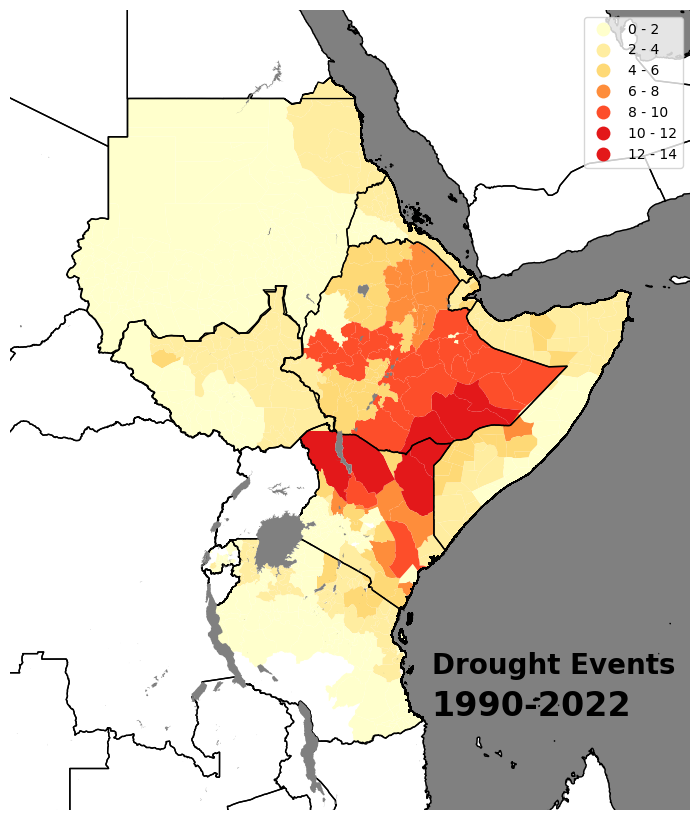

In [59]:
from matplotlib import colors
from matplotlib import pyplot as plt
import geoplot as gplt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import geoplot.crs as gcrs
import numpy as np
import mapclassify as mc


def return_colormap():
    """
    Create colormap of matplotlib based on number of class and given colorcode

    Parameters
    ----------
    params : class object
        Input/Output parameter definitions.
        
    Returns
    -------
    c_cmap : Object
        matplotlib colormap.

    """
    c = matplotlib.colors.ColorConverter().to_rgb
    colorlist=[c("#ffffcc"), c("#ffeda0"), c("#fed976"), c("#ffb24b"), c("#fe8d3b"), c("#fd4e2a"), c("#e3181a")]
    color_code=colorlist
    classif= [2, 4, 6, 8, 10, 12,14]
    c_cmap = LinearSegmentedColormap.from_list("my_colormap",color_code, N=len(classif), gamma=1.0)
    return c_cmap


norm = colors.LogNorm(vmin=db['count1'].min(), vmax=db['count1'].max())

c_cmap=return_colormap()


year='1990-2022'
da_plt=plt
plotsize={'width':8.0,'height':9.5}
mainmappost={'x':0.05,'y':-0.05,'width':0.85,'height':1.1}
da_plt.figure(figsize=(plotsize['width'],plotsize['height']))
mainmap=da_plt.axes((mainmappost['x'],mainmappost['y'],mainmappost['width'],mainmappost['height']), projection=ccrs.PlateCarree(),zorder=10)
x_min=21.838949
x_max=51.415695
y_min=-11.745695
y_max=23.145147
mainmap.set_extent([x_min,x_max,y_min,y_max])
#mainmap.add_geometries(db['geometry'], ccrs.PlateCarree(),edgecolor='red',facecolor=norm, alpha=1,zorder=2)
classif= [2, 4, 6, 8, 10, 12,14]

scheme = mc.UserDefined(db['count2'], classif)

gplt.choropleth(db, hue='count2', projection=gcrs.PlateCarree(),
    edgecolor='none', linewidth=.05,
    cmap=c_cmap,
    legend=True, scheme=scheme,ax=mainmap)   
#mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
mainmap.add_feature(cfeature.OCEAN, facecolor=(0.5,0.5,0.5))
#mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
fname='../../ea_shapefiles/ea_global_background.shp'
mainmap.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')
water_body='../../ea_shapefiles/Africa_Water_Bodies.shp'
mainmap.add_geometries(Reader(water_body).geometries(),ccrs.PlateCarree(),facecolor='grey')
mainmap.text(0.62, 0.13, str(year), fontsize=24,fontweight='bold',ha='left',va='center',color='black', transform = mainmap.transAxes)
mainmap.text(0.62, 0.18, 'Drought Events', fontsize=20,fontweight='bold',ha='left',va='center',color='black', transform = mainmap.transAxes)
#
output_png_file=f'output/fl/{str(year)}_fl.png'
#da_plt.savefig(output_png_file, transparent=False,bbox_inches='tight')
#da_plt.close()
da_plt.show()

## Floods

In [52]:
import pandas as pd
from datetime import datetime
import numpy as np
import pandas as pd
from ast import literal_eval

filepath='./'

filename=f'{filepath}em_dat_ea_flood_adm2_v0.xlsx'

dfb_dr=pd.read_excel(filename, engine='openpyxl')
#dfb_dr['year']= dfb_dr['Dis No'].str[:4]
#dfb_dr

dfb_dr['adm2_list'] = dfb_dr.geob_adm2_list.apply(lambda x: literal_eval(str(x)))
#dfb_dr['disno_list'] = dfb_dr['Dis No'].apply(lambda x: literal_eval(str(x)))

dfb_dr1=dfb_dr[['Dis No','adm2_list']]

dfb_dr2=dfb_dr1.explode('adm2_list')
dfb_dr2['year']=dfb_dr2['Dis No'].str.split('-').str[0]
#dfb_dr3=dfb_dr2.groupby('adm2_list').agg({'Dis No':lambda x: list(x)})

df = dfb_dr2.groupby(['adm2_list']).agg([ 'count'])

df1=df.reset_index()
#df1.columns=['adm2_list','count1','count2']
df1.columns=['shapeID','count1','count2']
df1['count1'].max()

19

In [53]:
import cartopy.crs as ccrs
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


adm2=gp.read_file('../../ea_shapefiles/ea_adm2_geoboundaries.shp')

db=pd.merge(adm2,df1,on='shapeID',how='right')

#adm2
db.info()
db1=db[db['geometry'].notnull()]
#nas=db1['shapeID'].tolist()
db1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeName   684 non-null    object  
 1   shapeISO    684 non-null    object  
 2   shapeID     726 non-null    object  
 3   shapeGroup  684 non-null    object  
 4   shapeType   684 non-null    object  
 5   geometry    684 non-null    geometry
 6   count1      726 non-null    int64   
 7   count2      726 non-null    int64   
dtypes: geometry(1), int64(2), object(5)
memory usage: 51.0+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 684 entries, 39 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeName   684 non-null    object  
 1   shapeISO    684 non-null    object  
 2   shapeID     684 non-null    object  
 3   shapeGroup  684 non-null    object  
 4   shapeType   684 non-null    object

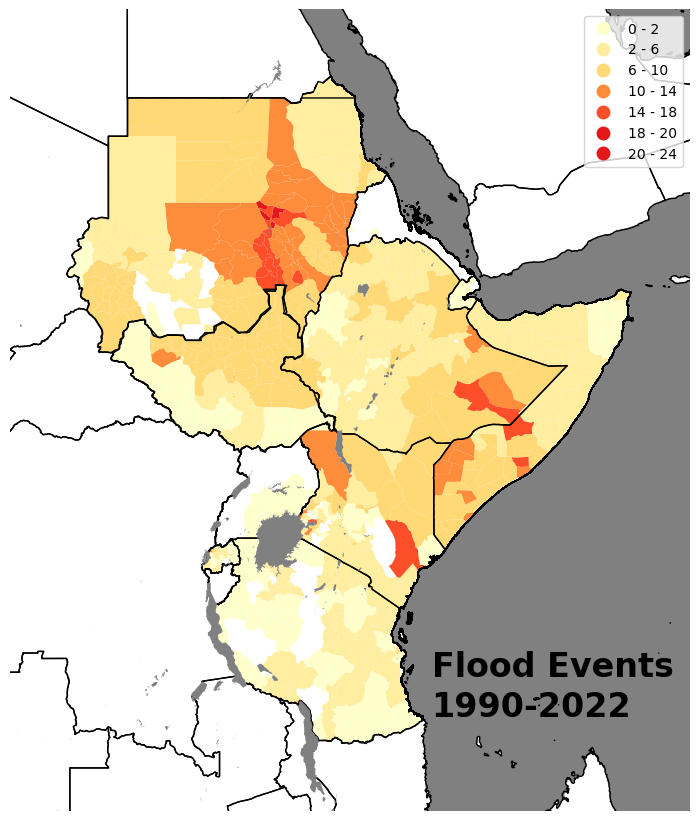

In [56]:
from matplotlib import colors
from matplotlib import pyplot as plt
import geoplot as gplt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import geoplot.crs as gcrs
import numpy as np
import mapclassify as mc


def return_colormap():
    """
    Create colormap of matplotlib based on number of class and given colorcode

    Parameters
    ----------
    params : class object
        Input/Output parameter definitions.
        
    Returns
    -------
    c_cmap : Object
        matplotlib colormap.

    """
    c = matplotlib.colors.ColorConverter().to_rgb
    colorlist=[c("#ffffcc"), c("#ffeda0"), c("#fed976"), c("#ffb24b"), c("#fe8d3b"), c("#fd4e2a"), c("#e3181a")]
    color_code=colorlist
    classif= [2, 6, 10, 14, 18, 20, 24]
    c_cmap = LinearSegmentedColormap.from_list("my_colormap",color_code, N=len(classif), gamma=1.0)
    return c_cmap


norm = colors.LogNorm(vmin=db['count1'].min(), vmax=db['count1'].max())

c_cmap=return_colormap()


year='1990-2022'
da_plt=plt
plotsize={'width':8.0,'height':9.5}
mainmappost={'x':0.05,'y':-0.05,'width':0.85,'height':1.1}
da_plt.figure(figsize=(plotsize['width'],plotsize['height']))
mainmap=da_plt.axes((mainmappost['x'],mainmappost['y'],mainmappost['width'],mainmappost['height']), projection=ccrs.PlateCarree(),zorder=10)
x_min=21.838949
x_max=51.415695
y_min=-11.745695
y_max=23.145147
mainmap.set_extent([x_min,x_max,y_min,y_max])
#mainmap.add_geometries(db['geometry'], ccrs.PlateCarree(),edgecolor='red',facecolor=norm, alpha=1,zorder=2)
classif= [2, 6, 10, 14, 18, 20, 24]

scheme = mc.UserDefined(db['count2'], classif)

gplt.choropleth(db, hue='count2', projection=gcrs.PlateCarree(),
    edgecolor='none', linewidth=.05,
    cmap=c_cmap,
    legend=True, scheme=scheme,ax=mainmap)   
#mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
mainmap.add_feature(cfeature.OCEAN, facecolor=(0.5,0.5,0.5))
#mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
fname='../../ea_shapefiles/ea_global_background.shp'
mainmap.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')
water_body='../../ea_shapefiles/Africa_Water_Bodies.shp'
mainmap.add_geometries(Reader(water_body).geometries(),ccrs.PlateCarree(),facecolor='grey')
mainmap.text(0.62, 0.13, str(year), fontsize=24,fontweight='bold',ha='left',va='center',color='black', transform = mainmap.transAxes)
mainmap.text(0.62, 0.18, 'Flood Events', fontsize=24,fontweight='bold',ha='left',va='center',color='black', transform = mainmap.transAxes)
#output_png_file=f'output/fl/{str(year)}_fl.png'
#da_plt.savefig(output_png_file, transparent=False,bbox_inches='tight')
#da_plt.close()
da_plt.show()

## there is missing geeomrty for flood 

In [33]:
import pandas as pd
from datetime import datetime
import numpy as np

em_data_filepath='emdat_public_2022_08_11_query_uid-IKGfZc.xlsx'

dfb = pd.read_excel(em_data_filepath, engine='openpyxl',skiprows=6,sheet_name = 'emdat data')

dfb_fl=dfb[dfb['Disaster Type']=='Flood']

ea_cntr=['Djibouti', 'Eritrea','Ethiopia','Kenya','Rwanda', 'Somalia','South Sudan','Sudan (the)','Tanzania, United Republic of']

#dfb1_ea=dfb1[dfb1['Country'].str.contains(ea_cntr)]
dfb_fl_ea=dfb_fl[dfb_fl['Country'].isin(ea_cntr)]


#dfb_dr_ea.info()

dfb_fl_ea_time=dfb_fl_ea[['Dis No','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day']]

dfb_fl_ea_time.to_csv('em_dat_flood_dates_v0.csv')

db_time=pd.read_csv('em_dat_flood_dates_v1.csv')


db_time['Start Year']=db_time["Start Year"].astype(str)
#dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].astype(str)
db_time['Start Month']=db_time["Start Month"].apply(lambda x: str(int(x)).zfill(2))
db_time['End Year']=db_time["End Year"].astype(str)
#dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].astype(str)
db_time['End Month']=db_time["End Month"].apply(lambda x: str(int(x)).zfill(2))


def create_daterange_list(row):
    start_date_str=row['Start Year']+'-'+row['Start Month']+'-'+str(int(row['Start Day']))
    end_date_str=row['End Year']+'-'+row['End Month']+'-'+str(int(row['End Day']))
    date_str_list=pd.date_range(start_date_str,end_date_str, freq='D').strftime("%Y-%m-%d").tolist()
    return date_str_list


date_str_list_cont=[]
for idx,row in db_time.iterrows():
    #dfb_dr_ea_time.at[idx,'date_str_list'] = create_daterange_list(row)
    #print(idx)
    #print(row)
    date_str_list=create_daterange_list(row)
    date_str_list_cont.append(date_str_list)
    
    
db_time['date_str_list']=date_str_list_cont
db_time1=db_time[['Dis No','date_str_list']]
# #dfb_dr_ea_time

df_fl=db_time1.explode('date_str_list')

df_t=df_fl.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

# #df_dr1=df_dr.drop_duplicates('date_str_list')
# dfb_fl_ea_time['date_str_list']=date_str_list_cont
# df_fl=dfb_dr_ea_time.explode('date_str_list')
# #df_dr1=df_dr.drop_duplicates('date_str_list')

# df_t=df_fl.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

dft1=df_t.reset_index()
dft1['date']=dft1['date_str_list'].apply(pd.to_datetime)
dft1['year']=dft1['date'].dt.year
df=dft1.groupby('year').agg({'Dis No': 'sum'})
df['disno1'] = df['Dis No'].apply(lambda x: list(set(x)))
df_year=df.reset_index()
df_year1=df_year[['year','disno1']]


/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [42]:
import pandas as pd

filepath='./'

filename=f'{filepath}em_dat_ea_flood_adm2_v0.xlsx'

dfb_fl=pd.read_excel(filename, engine='openpyxl')
#dfb_dr['year']= dfb_dr['Dis No'].str[:4]
#dfb_dr

dfb_fl['adm2_list'] = dfb_fl.geob_adm2_list.apply(lambda x: literal_eval(str(x)))
#dfb_dr['disno_list'] = dfb_dr['Dis No'].apply(lambda x: literal_eval(str(x)))

dfb_fl1=dfb_fl[['Dis No','adm2_list']]


# df_year3=df_year2[df_year2['year']==1990]
# dis_no_list=df_year3['disno1'].tolist()
# dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
# df_b2=dfb_dr1[dfb_dr1['Dis No'].isin(dis_no_flat_list)]
# adm2_list0=df_b2['adm2_list'].tolist()
# flat_list = [item for sublist in adm2_list0 for item in sublist]


def get_adm2_list(year,df_year,df_b):
    df_year1=df_year[df_year['year']==year]
    dis_no_list=df_year1['disno1'].tolist()
    dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
    df_b2=df_b[df_b['Dis No'].isin(dis_no_flat_list)]
    adm2_list0=df_b2['adm2_list'].tolist()
    flat_list = [item for sublist in adm2_list0 for item in sublist]
    return flat_list

def get_geodf(list_adm2_year,adm2):
    adm2_1=adm2[adm2['shapeID'].isin(list_adm2_year)]
    adm2_1a=adm2_1[['shapeID']]
    adm2_1a['event']=1.0
    db=pd.merge(adm2,adm2_1a,on='shapeID',how='right')
    db1=db[['geometry','event','shapeID']]
    return db1


adm2=gp.read_file('/home/ea_shapefiles/ea_adm2_geoboundaries.shp')

year_list=np.arange(1990,2023,1)

db_geodf_cont=[]
for yearl in year_list:
    list_adm2_year=get_adm2_list(yearl,df_year1,dfb_fl1)
    db_geodf=get_geodf(list_adm2_year,adm2)
    db_geodf['year']=yearl
    db_geodf_cont.append(db_geodf)

/tmp/ipykernel_64/3749896733.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm2_1a['event']=1.0
/tmp/ipykernel_64/3749896733.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm2_1a['event']=1.0
/tmp/ipykernel_64/3749896733.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [46]:
shpdb=pd.concat(db_geodf_cont)
#shpdb1=shpdb[shpb['shapeID']=='']

shpdb[shpdb['shapeID'].isin(nas)]

,geometry,event,shapeID,year


In [32]:
import pandas as pd

db=pd.read_csv('em_dat_flood_dates_v0.csv')
db

,Unnamed: 0,Dis No,Start Year,Start Month,Start Day,End Year,End Month,End Day
0,33,1993-0503-DJI,1993,1.0,26.0,1993,1.0,26.0
1,41,1990-0582-ETH,1990,8.0,27.0,1990,9.0,1.0
2,44,1990-0352-KEN,1990,4.0,14.0,1990,4.0,15.0
3,125,1993-0519-ETH,1993,8.0,NaN,1993,8.0,NaN
4,126,1993-0520-ETH,1993,8.0,NaN,1993,8.0,NaN
...,...,...,...,...,...,...,...,...
264,4573,2022-0055-RWA,2022,1.0,1.0,2022,1.0,27.0
265,4577,2022-0232-RWA,2022,4.0,23.0,2022,4.0,24.0
266,4580,2022-0332-SOM,2022,5.0,12.0,2022,5.0,30.0
267,4622,2022-0445-SDN,2022,7.0,10.0,2022,8.0,5.0
